In [591]:
from Bio import pairwise2,Phylo
from Bio.Cluster import treecluster,kcluster
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt
import os
#Reading Alzheimers and Cancer siRNA sequence
alist=[]
file_loc = "ASPsiDB.xlsx"
df1 = pd.read_excel(file_loc, 'Alzheimers',index_col=None, na_values=['NA'], usecols = "C,G,H")
df2 = pd.read_excel(file_loc, 'Cancer',index_col=None, na_values=['NA'], usecols = "C,G,H")
df3 = pd.read_excel(file_loc, 'ALS',index_col=None, na_values=['NA'], usecols = "C,G,H")

#Data: siRNA,Disease
alz= df1.iloc[::2, :]
can = df2.iloc[::2, :]
als = df3.iloc[::2, :]

frames = [alz,can,als]

#Final dataset with all siRNA and corresponding disease
dataset = pd.concat(frames)


In [592]:
X1=[]
X2=[]
X3=[]
target=[]
disease = {
"Alzheimers disease" : 0,
"Cancer" : 1,
"Amyotrophic Lateral Sclerosis (ALS)" : 2,
}
dataset.Disease=dataset['Disease'].map(disease)
dataset.Disease
dataset.head()

for index, row in dataset.iterrows():
    X1.append(row['ASP-siRNA'])
    X2.append(row['Disease'])
    X3.append(row['Gene'])
    


In [593]:
print(len(X1))
sizes = [len(rec) for rec in X1]
print(len(sizes))


473
473


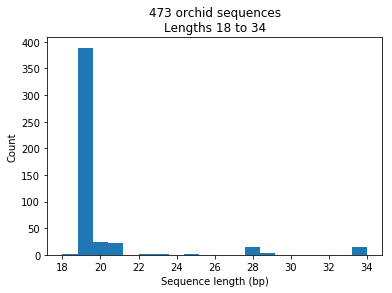

In [594]:
import pylab
pylab.hist(sizes, bins=20)
pylab.title("%i orchid sequences\nLengths %i to %i" \
            % (len(sizes),min(sizes),max(sizes)))
pylab.xlabel("Sequence length (bp)")
pylab.ylabel("Count")
pylab.show()

In [595]:
X=[]
for rec in X1:
    if(len(rec)==19):
        X.append(rec)
        
print(len(X))


389


In [607]:
pre_dataset=dataset.loc[dataset['ASP-siRNA'].isin(X)]

X1=[]
X2=[]
X3=[]
target=[]

for index, row in pre_dataset.iterrows():
    X1.append(row['ASP-siRNA'])
    X2.append(row['Disease'])
   # X3.append(row['Gene'])
    


['UGAAGUGAAUCUGGAUGCA', 'UUCAUUUUCUACAGUGUUG', 'UCAUUUUCUACAGUGUUGU', 'CAUUUUCUACAGUGUUGUG', 'AUUUUCUACAGUGUUGUGG', 'UUUUCUACAGUGUUGUGGU', 'UUUCUACAGUGUUGUGGUU', 'UUCUACAGUGUUGUGGUUG', 'UCUACAGUGUUGUGGUUGG', 'CUACAGUGUUGUGGUUGGU', 'UACAGUGUUGUGGUUGGUA', 'ACAGUGUUGUGGUUGGUAA', 'CAGUGUUGUGGUUGGUAAA', 'AGUGUUGUGGUUGGUAAAG', 'GUGUUGUGGUUGGUAAAGC', 'UGUUGUGGUUGGUAAAGCC', 'GUUGUGGUUGGUAAAGCCU', 'UUGUGGUUGGUAAAGCCUC', 'UGUGGUUGGUAAAGCCUCA', 'GUGGUUGGUAAAGCCUCAG', 'GACAGUGAUCGGCAUCACC', 'ACAGUGAUCGGCAUCACCU', 'CAGUGAUCGGCAUCACCUU', 'AGUGAUCGGCAUCACCUUG', 'GUGAUCGGCAUCACCUUGG', 'CGACAGUGAUCUUCAUCAC', 'GACAGUGAUCUUCAUCACC', 'ACAGUGAUCUUCAUCACCU', 'CAGUGAUCUUCAUCACCUU', 'AGUGAUCUUCAUCACCUUG', 'CGACAGUGAUCAUCAUCAC', 'GACAGUGAUCAUCAUCACC', 'ACAGUGAUCAUCAUCACCU', 'CAGUGAUCAUCAUCACCUU', 'AGUGAUCAUCAUCACCUUG', 'UUGUGGUAGUUGGAGCUGU', 'UUGUGGUAGUUGGAGCUGU', 'UUGUGAGGCACUGCCCCCA', 'UUGUGAGGCACUGCCCCCA', 'UUGGCGUAGGCAAGAGUGC', 'UUGGCGUAGGCAAGAGUGC', 'UUGGAGCUGUUGGCGUAGG', 'UUGGAGCUGUUGGCGUAGG', 'UGUUGGCGU

In [597]:
def similaritydistance(x1, x2):
    
    for item in x1:
        new= "".join([chr(it) for it in item])
    
    new1= "".join([chr(item) for item in x2])
    
    print(new)
    print(new1)
    
    #print(new1)
    distance=pairwise2.align.globalxx(new,new1,score_only=True)
    #print(distance)
    #print('nxt')
    return distance

In [598]:
def similardistance(x1, x2):
    
    new= "".join([chr(it) for it in x1])
    
    new1= "".join([chr(item) for item in x2])
    
    
    #print(new1)
    distance=pairwise2.align.globalxx(new,new1,score_only=True)
    #print(distance)
    #print('nxt')
    return distance

In [599]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X1, X2, test_size=0.2, random_state=64)


matrix = np.asarray([np.fromstring(s, dtype=np.uint8) for s in X_train])

from Bio import kNN

k = 10

model = kNN.train(matrix, y_train, k)

print(model)
#from Bio.Cluster import clustercentroids


#cdata, cmask = clustercentroids(matrix)

/Users/ravs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """


In [600]:
y_hat=[]
matrix_test = np.asarray([np.fromstring(s, dtype=np.uint8) for s in x_test])

#for i in range(len(y_test)):
        #print("True:", y_test[i], "Predicted:", kNN.classify(model, matrix_test[i], distance_fn = similardistance))
 #       y_hat.append(kNN.classify(model, matrix_test[i], distance_fn = similardistance))

#print(y_test)
true_pred=0;
false_pred=0;
for i in range(len(y_test)):
    y_pred=kNN.classify(model, matrix_test[i], distance_fn = similardistance)
    y_hat.append(y_pred)
  

/Users/ravs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


In [601]:
from sklearn.metrics import accuracy_score
accuracy_score(y_hat, y_test)

0.3333333333333333

In [602]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_hat, y_test))  
print(classification_report(y_hat, y_test))  

[[ 0  9 27]
 [ 2  3  6]
 [ 5  3 23]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        36
          1       0.20      0.27      0.23        11
          2       0.41      0.74      0.53        31

avg / total       0.19      0.33      0.24        78



In [603]:
error = []
pred_hat=[]
# Calculating error for K values between 1 and 40
for i in range(1, 30):  
    model = kNN.train(matrix, y_train, k)
    for i in range(len(y_test)):
        pred_i = kNN.classify(model, matrix_test[i], distance_fn = similardistance)
        pred_hat.append(pred_i)
    error.append(np.mean(pred_hat != y_test))

Text(0,0.5,'Mean Error')

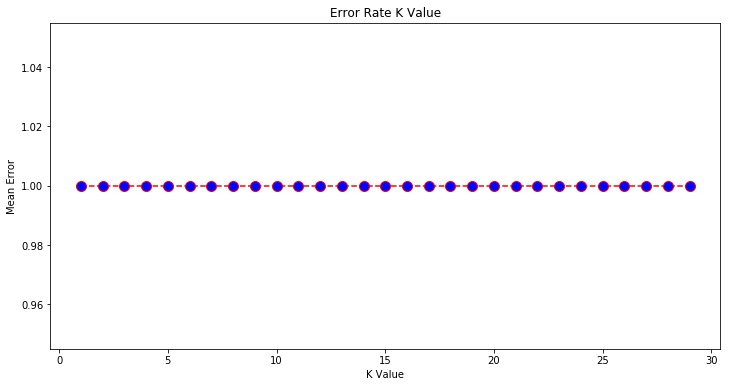

In [604]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

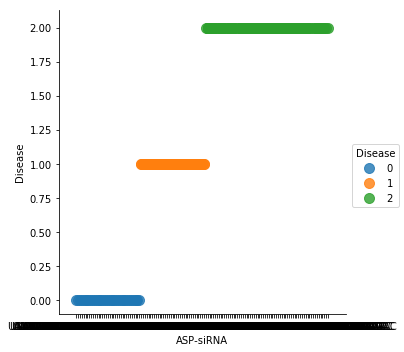

In [609]:
import seaborn

seaborn.lmplot('ASP-siRNA', 'Disease', data=pre_dataset, 
       fit_reg=False,hue="Disease", scatter_kws={"marker": "D","s": 100})